# Ant 2x4

In [1]:
import numpy as np
from utils import get_rewards_for_last_n_runs, average_and_confidence, plot_with_confidence_interval, plot_multiple_with_confidence_intervals
import os

/Users/Hunter/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
# R0, _, R0t, time = recent_rewards('/Users/Hunter/Development/Academic/UML/RL/Hasenfus-RL/Multi-Agent/maddpg/experiments/learning_curves/Ant.2x4.0.001.350.0.99/', valid=False, aggrew=False, time=True)
base_path = '/Users/Hunter/Development/Academic/UML/RL/Hasenfus-RL/Multi-Agent/maddpg/experiments/learning_curves/Ant.2x4.0.001.350.0.99/'
n = 5  # for last 5 runs
rewards_data = get_rewards_for_last_n_runs(base_path, n)
rewards_data_mal = get_rewards_for_last_n_runs(base_path + 'malfunction/', n)   



In [ ]:
rewards = []
rewards_mal = []
for i in range(n):
    rewards.append(rewards_data[i][0])
    rewards_mal.append(rewards_data_mal[i][0])
    
avg_rewards, conf_rewards = average_and_confidence(rewards_data)
avg_rewards_mal, conf_rewards_mal = average_and_confidence(rewards_data_mal)

In [ ]:
len(rewards_data[0]), len(rewards_data_mal[0])

In [ ]:
plot_multiple_with_confidence_intervals([avg_rewards, avg_rewards_mal], [conf_rewards, conf_rewards_mal], np.arange(avg_rewards.shape[0]) ,save=True, title='Ant.2x4.comparison', labels= ['Normal', 'Malfunctioning'])

# Ant 4x2

In [2]:
# R0, _, R0t, time = recent_rewards('/Users/Hunter/Development/Academic/UML/RL/Hasenfus-RL/Multi-Agent/maddpg/experiments/learning_curves/Ant.2x4.0.001.350.0.99/', valid=False, aggrew=False, time=True)
base_path = '/Users/Hunter/Development/Academic/UML/RL/Hasenfus-RL/Multi-Agent/maddpg/experiments/learning_curves/Ant.4x2.0.001.350.0.99/'

n = 3  # for last 5 runs
R0 = get_rewards_for_last_n_runs(base_path + 'R0', n)
R0_mal = get_rewards_for_last_n_runs(base_path + 'malfunction/R0', n)
R1 = get_rewards_for_last_n_runs(base_path + 'R1', n)
R1_mal = get_rewards_for_last_n_runs(base_path + 'malfunction/R1', n)
R2 = get_rewards_for_last_n_runs(base_path + 'R2', n)
R2_mal = get_rewards_for_last_n_runs(base_path + 'malfunction/R2', n)


In [3]:
lR0 = []
lR0_mal = []
lR1 = []
lR1_mal = []
lR2 = []
lR2_mal = []    
for i in range(n):
    lR0.append(R0[i][0])
    lR0_mal.append(R0_mal[i][0])
    lR1.append(R1[i][0])
    lR1_mal.append(R1_mal[i][0])
    lR2.append(R2[i][0])
    lR2_mal.append(R2_mal[i][0])
    
lR0 = np.array(lR0)
lR0_mal = np.array(lR0_mal)
lR1 = np.array(lR1)
lR1_mal = np.array(lR1_mal)
lR2 = np.array(lR2)
lR2_mal = np.array(lR2_mal)

avg_r0, conf_r0 = average_and_confidence(R0)
avg_r0_mal, conf_r0_mal = average_and_confidence(R0_mal)
avg_r1, conf_r1 = average_and_confidence(R1)
avg_r1_mal, conf_r1_mal = average_and_confidence(R1_mal)
avg_r2, conf_r2 = average_and_confidence(R2)
avg_r2_mal, conf_r2_mal = average_and_confidence(R2_mal)


In [4]:
lR0.shape, lR0_mal.shape, lR1.shape, lR1_mal.shape, lR2.shape, lR2_mal.shape

((3, 3000), (3, 3000), (3, 60600), (3, 600), (3, 60000), (3, 60000))

In [5]:
R1_reshaped = np.array([[0,0,0]]).reshape(3,1)
for x in range(lR1.shape[1]):
    if x % 100 == 0:
        # update_rewards_reshaped.append(avg_update_rewards[x])
        # RT = np.concatenate((update_rewards_reshaped, update_rewards[:,x][:,np.newaxis]), axis=1)
        R1_reshaped = np.concatenate((R1_reshaped, lR1[:,x][:,np.newaxis]), axis=1)
        
R1_reshaped = np.array(R1_reshaped[:,1:])
R1_reshaped = np.array(R1_reshaped[:,:-6])
print(R1_reshaped.shape)

avg_r1_reshaped, conf_r1_reshaped = average_and_confidence([R1_reshaped])
# 
# print(update_rewards_reshaped.shape)
# update_rewards_reshaped = np.array(update_rewards_reshaped[:,1:])
# update_rewards_reshaped = np.array(update_rewards_reshaped[:,:-6])
# print(update_rewards_reshaped.shape)
# 
# avg_update_rewards_reshaped, conf_update_rewards_reshaped = average_and_confidence([update_rewards_reshaped])




    

(3, 600)


/Users/Hunter/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/Hunter/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


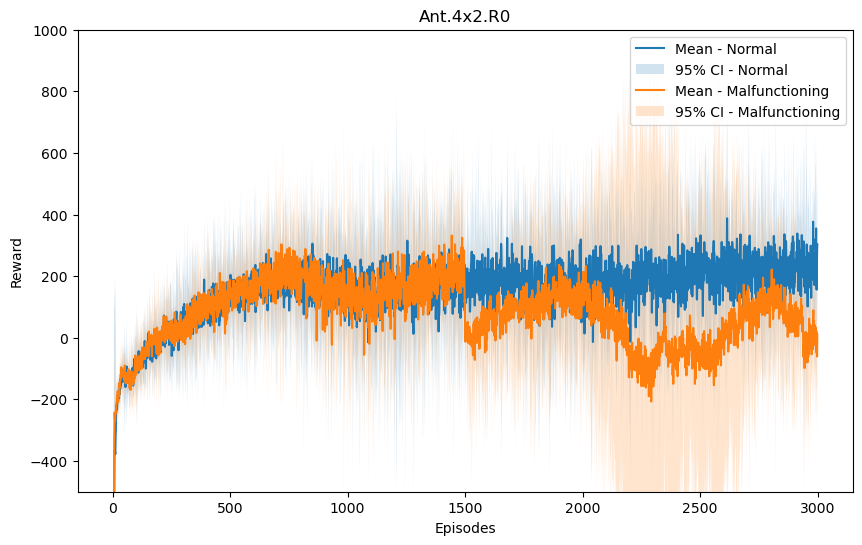

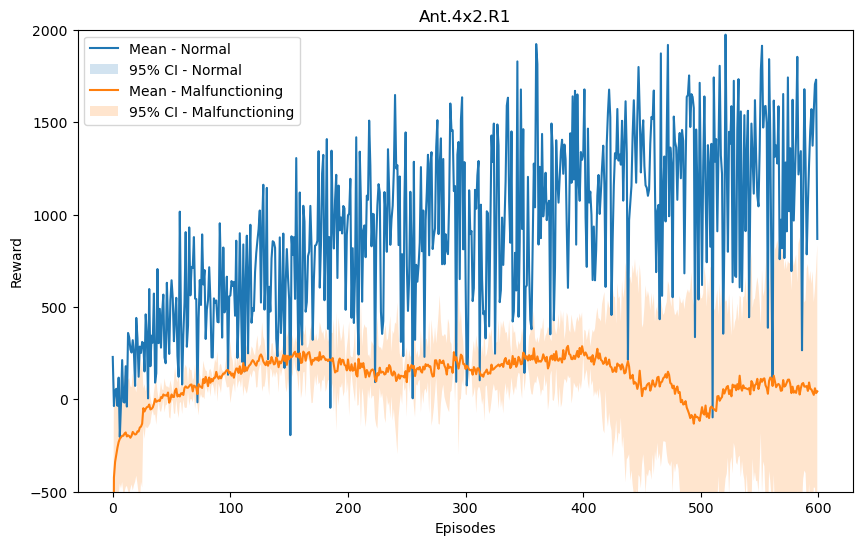

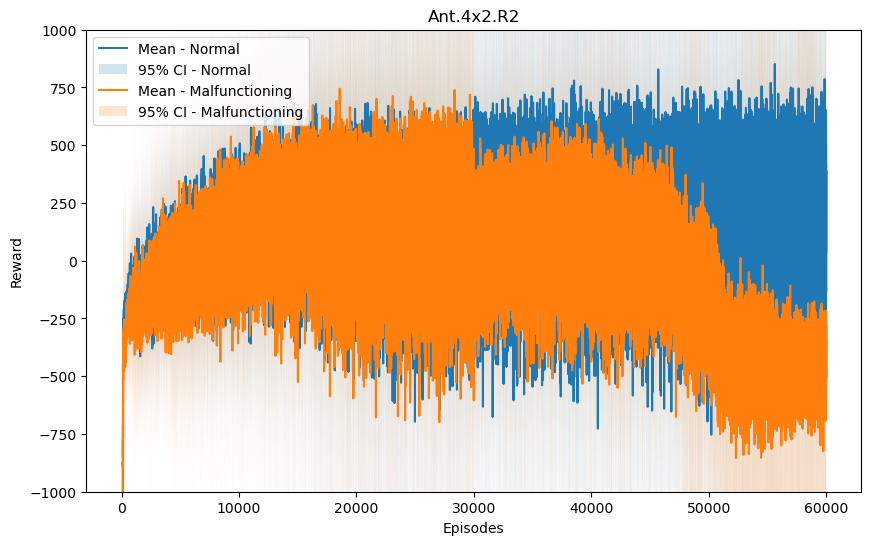

In [9]:

plot_multiple_with_confidence_intervals([avg_r0, avg_r0_mal], [conf_r0, conf_r0_mal], np.arange(avg_r0.shape[0]) , save= True,title='Ant.4x2.R0',labels= ['Normal', 'Malfunctioning'], xlabel='Episodes (save rate = 1000, total episodes 60,000)', ylabel='Reward', ylim=(-500,1000))
plot_multiple_with_confidence_intervals([avg_r1_reshaped, avg_r1_mal], [conf_r1_reshaped, conf_r1_mal], np.arange(avg_r1_reshaped.shape[0]) , save= True,title='Ant.4x2.R1',labels= ['Normal', 'Malfunctioning'], xlabel='Episodes', ylabel='Reward', ylim = (-500,2000))
plot_multiple_with_confidence_intervals([avg_r2, avg_r2_mal], [conf_r2, conf_r2_mal], np.arange(avg_r2.shape[0]) , save= True,title='Ant.4x2.R2',labels= ['Normal', 'Malfunctioning'], xlabel='Episodes', ylabel='Reward', ylim = (-1000,1000))

# Cheetah 3x2

In [ ]:
# R0, _, R0t, time = recent_rewards('/Users/Hunter/Development/Academic/UML/RL/Hasenfus-RL/Multi-Agent/maddpg/experiments/learning_curves/Ant.2x4.0.001.350.0.99/', valid=False, aggrew=False, time=True)
base_path = '/Users/Hunter/Development/Academic/UML/RL/Hasenfus-RL/Multi-Agent/maddpg/experiments/learning_curves/HalfCheetah.2x3.0.001.350.0.99'
n = 5  # for last 5 runs
rewards_data = get_rewards_for_last_n_runs(base_path, n)
# rewards_data_mal = get_rewards_for_last_n_runs(base_path + 'malfunction/', n)   



In [ ]:
rewards = []
# rewards_mal = []
for i in range(n):
    rewards.append(rewards_data[i][0])
    # rewards_mal.append(rewards_data_mal[i][0])
    
avg_rewards, conf_rewards = average_and_confidence(rewards_data)
# avg_rewards_mal, conf_rewards_mal = average_and_confidence(rewards_data_mal)

In [ ]:
avg_rewards.shape, conf_rewards.shape

In [ ]:
# plot_multiple_with_confidence_intervals([avg_rewards, avg_rewards_mal], [conf_rewards, conf_rewards_mal], np.arange(avg_rewards.shape[0]) , save= True,title='Ant.4x2.comparison',labels= ['Normal', 'Malfunctioning'])
plot_multiple_with_confidence_intervals([avg_rewards], [conf_rewards], np.arange(avg_rewards.shape[0]), save=True, title='HalfCheetah.2x3', labels='Normal')

# Cheetah 6x1

In [ ]:
# R0, _, R0t, time = recent_rewards('/Users/Hunter/Development/Academic/UML/RL/Hasenfus-RL/Multi-Agent/maddpg/experiments/learning_curves/Ant.2x4.0.001.350.0.99/', valid=False, aggrew=False, time=True)
base_path1 ="/Users/Hunter/Development/Academic/UML/RL/Hasenfus-RL/Multi-Agent/maddpg/experiments/learning_curves/HalfCheetah.6x1.0.001.350.0.99/"
n = 5  # for last 5 runs
rewards_data = get_rewards_for_last_n_runs(base_path1, n)
# rewards_data_mal = get_rewards_for_last_n_runs(base_path + 'malfunction/', n)   



In [ ]:
avg_rewards.shape, conf_rewards.shape

In [ ]:
# plot_multiple_with_confidence_intervals([avg_rewards, avg_rewards_mal], [conf_rewards, conf_rewards_mal], np.arange(avg_rewards.shape[0]) , save= True,title='Ant.4x2.comparison',labels= ['Normal', 'Malfunctioning'])
plot_multiple_with_confidence_intervals([avg_rewards], [conf_rewards], np.arange(avg_rewards.shape[0]), save=True, title='HalfCheetah.6x1', labels='Normal')

# Humanoid 

In [ ]:
# R0, _, R0t, time = recent_rewards('/Users/Hunter/Development/Academic/UML/RL/Hasenfus-RL/Multi-Agent/maddpg/experiments/learning_curves/Ant.2x4.0.001.350.0.99/', valid=False, aggrew=False, time=True)
base_path = '/Users/Hunter/Development/Academic/UML/RL/Hasenfus-RL/Multi-Agent/maddpg/experiments/learning_curves/Humanoid.9x8.0.001.350.0.99/'
n = 5  # for last 5 runs
rewards_data = get_rewards_for_last_n_runs(base_path, n)
# rewards_data_mal = get_rewards_for_last_n_runs(base_path + 'malfunction/', n)   



In [ ]:
avg_rewards.shape, conf_rewards.shape

In [ ]:
# plot_multiple_with_confidence_intervals([avg_rewards, avg_rewards_mal], [conf_rewards, conf_rewards_mal], np.arange(avg_rewards.shape[0]) , save= True,title='Ant.4x2.comparison',labels= ['Normal', 'Malfunctioning'])
plot_multiple_with_confidence_intervals([avg_rewards], [conf_rewards], np.arange(avg_rewards.shape[0]), save=True, title='HalfCheetah.2x3', labels='Normal')

# Humanoid

In [ ]:
R0, _, R0t, time = recent_rewards('/Users/Hunter/Development/Academic/UML/RL/Hasenfus-RL/Multi-Agent/maddpg/experiments/learning_curves/HalfCheetah.6x1.0.001.350.0.99/', valid=False, aggrew=False, time=True)



In [ ]:
plt.plot(R0, label='R0')
plt.legend()

plt.xlabel('Episodes')
plt.ylabel('Value')
plt.title('Cheetah 6x1')
plt.savefig('../Multi-Agent/maddpg/experiments/plots/Cheetah6x1.png')
